First we are importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

Now importing the Hass Avocado data from github source by using pandas data frame

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

We found that out of 16468 Rows the last 14951 Rows missing data (NaN Values) of all the columns, so we are droping these No Value data

In [5]:
df=df.dropna()

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [7]:
df.shape

(1517, 14)

Now our dataset is consist of 1517 Rows with 14 Columns

In [8]:
df.sample()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
203,35.0,26-04-2015,1.15,4923565.04,2421009.67,1729486.77,196469.02,576599.58,548252.41,26483.99,1863.18,conventional,2015.0,California


First we will make the Classification ML Model to predict the very last column "region"

We are considering the very first column "Unnamed:0" is of no use for our further process, so droping this column from dataset.

In [9]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


We have a Date column in this dataset, but we need only Month & Year to predict in which Month & which Year how much sale of Hass Avocado is made, so total Date is not required, but only Month & Year is required and out of which a separate Year column is already exist in our above data set. So we have to extract only the Month from above Date colunm and afterward will drop the Date column.

In [11]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

As the above Date column is of Oject data type, first we will convert this one to data type of datetime by using pandas datetime method to further extract month from it.

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

Now the data type of Date column is converted to datetime datatype. Now we are extracting the "Month" from this by using the datetime method.

In [14]:
df['Month']=df['Date'].dt.strftime('%m')

In [15]:
df['Month']

0       12
1       12
2       12
3       06
4       11
        ..
1512    10
1513    09
1514    02
1515    09
1516    09
Name: Month, Length: 1517, dtype: object

In [16]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,10
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,09
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,02
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,09


In [17]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
Month                   object
dtype: object

As the Month has been extracted separately and appended at the last column of the dataset, but still it is of Oject data type. So we will convert the Month column to Integer data type, so that our Machine Learning model will be able to read the same

In [18]:
df['Month']=df['Month'].astype(int)

In [19]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
Month                    int32
dtype: object

As the Year is also of Float data type, we are converting the same into Interger data type, due to no decimal values are required for Year and Month types of data.

In [20]:
df['year']=df['year'].astype(int)

In [21]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int32
region                  object
Month                    int32
dtype: object

Our Month has been extracted and the required data types are changed, now we will drop the Date column from our dataset.

In [22]:
df.drop(['Date'], axis=1, inplace=True)

In [23]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9


We are going to convert the rest of the object data type columns (i.e. "type" & "region") to make these readable for our ML Model

In [24]:
le=sklearn.preprocessing.LabelEncoder()

In [25]:
for c in df.select_dtypes(include="object").columns:
    df[c]=le.fit_transform(df[c].astype(str))

In [26]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,9


In [27]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int32
region            int32
Month             int32
dtype: object

Now all the features are of numeric values and readable for the ML model.

As we have to make one Classification Model to predict "Region" and one Linear Model to predict "Average Price", so we are going to put both of these column in to last for making our futher process eassier.

In [28]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
96,1.12,572019.8,40867.8,386137.78,23343.49,121670.73,119007.61,2663.12,0.0,0,2015,2,11


In [29]:
target1=df.pop('region')

In [30]:
df.insert(12, 'Region', target1)

In [31]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,12,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,12,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,12,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,10,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,9,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,2,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,9,7


In [32]:
target2=df.pop('AveragePrice')

In [33]:
df.insert(12, 'AveragePrice', target2)

In [34]:
df

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Region,AveragePrice
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,12,0,1.33
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,12,0,1.35
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,12,0,0.93
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,6,0,1.08
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,11,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,10,7,1.39
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,9,7,1.51
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,2,7,1.48
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,9,7,1.47


We are going for the Non Graphical and Graphical Analysis

In [35]:
dfcor=df.corr()

In [36]:
dfcor

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Region,AveragePrice
Total Volume,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,-0.055212,0.236579,-0.140470
4046,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,-0.053007,0.269481,-0.190096
4225,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,-0.058429,0.215733,-0.092084
4770,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,-0.055079,0.138092,-0.100567
Total Bags,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,-0.047747,0.190001,-0.111597
Small Bags,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,-0.048978,0.168650,-0.097682
Large Bags,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,-0.039242,0.297452,-0.177480
XLarge Bags,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,0.021452,-0.046144,-0.048284
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,NaN,1.000000,-0.013144,-0.470472,0.178683


<AxesSubplot:>

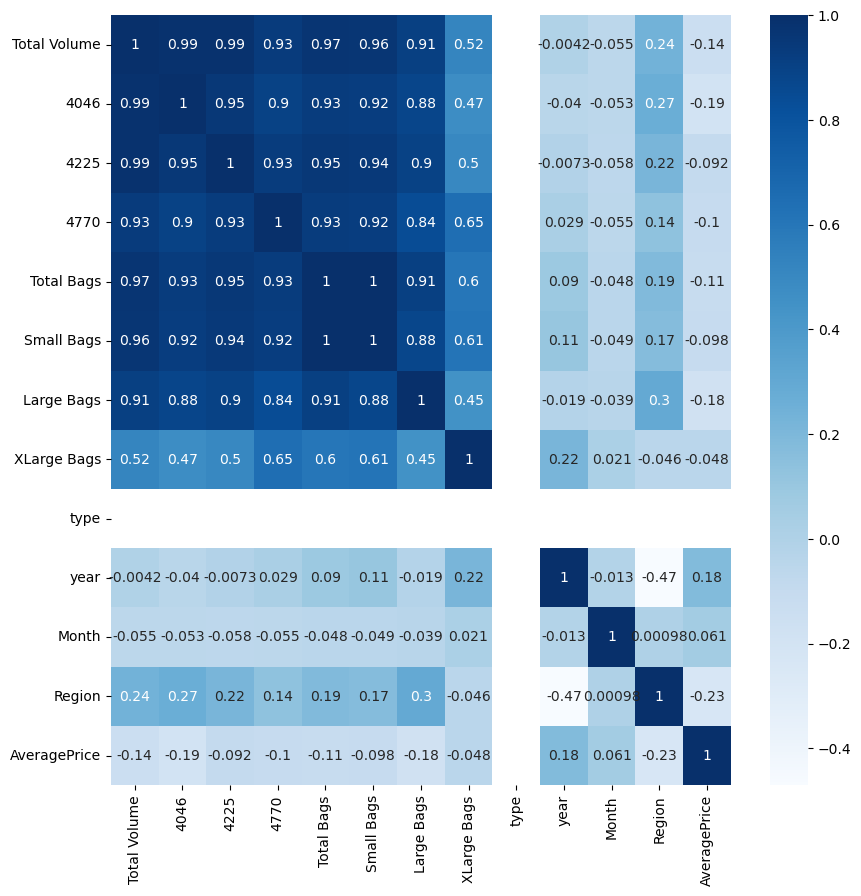

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,annot=True,cmap='Blues')

By the above corelation analysis, we observed that the Xlarge Bags feature's corelation with our both the target variables Region and Average Price are very closer to zero (i.e. -0.046 & -0.048 respectively), also the feature "type" has no corelation with any other features of this data set. So we are droping XLarge Bags & type features also.

In [38]:
df.drop(['XLarge Bags'], axis=1, inplace=True)

In [39]:
df.drop(['type'], axis=1, inplace=True)

In [40]:
df

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month,Region,AveragePrice
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2015,12,0,1.33
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2015,12,0,1.35
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2015,12,0,0.93
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2015,6,0,1.08
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2015,11,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,2016,10,7,1.39
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,2016,9,7,1.51
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,2016,2,7,1.48
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,2016,9,7,1.47


In [41]:
df.describe()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month,Region,AveragePrice
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2015.162821,6.362558,21.196440,1.074990
std,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,0.369324,3.472146,16.132398,0.188891
min,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,2015.000000,1.000000,0.000000,0.490000
25%,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,2015.000000,3.000000,6.000000,0.980000
50%,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,2015.000000,6.000000,19.000000,1.080000
75%,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,2015.000000,9.000000,35.000000,1.190000
max,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,2016.000000,12.000000,50.000000,1.680000


As above it has been observed that, there are differences between the 75% percentile and maximum values, so outliers possibilites are there of many features.

Total Volume       AxesSubplot(0.125,0.712609;0.133621x0.167391)
4046            AxesSubplot(0.285345,0.712609;0.133621x0.167391)
4225             AxesSubplot(0.44569,0.712609;0.133621x0.167391)
4770            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Total Bags      AxesSubplot(0.766379,0.712609;0.133621x0.167391)
Small Bags         AxesSubplot(0.125,0.511739;0.133621x0.167391)
Large Bags      AxesSubplot(0.285345,0.511739;0.133621x0.167391)
year             AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Month           AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Region          AxesSubplot(0.766379,0.511739;0.133621x0.167391)
AveragePrice        AxesSubplot(0.125,0.31087;0.133621x0.167391)
dtype: object

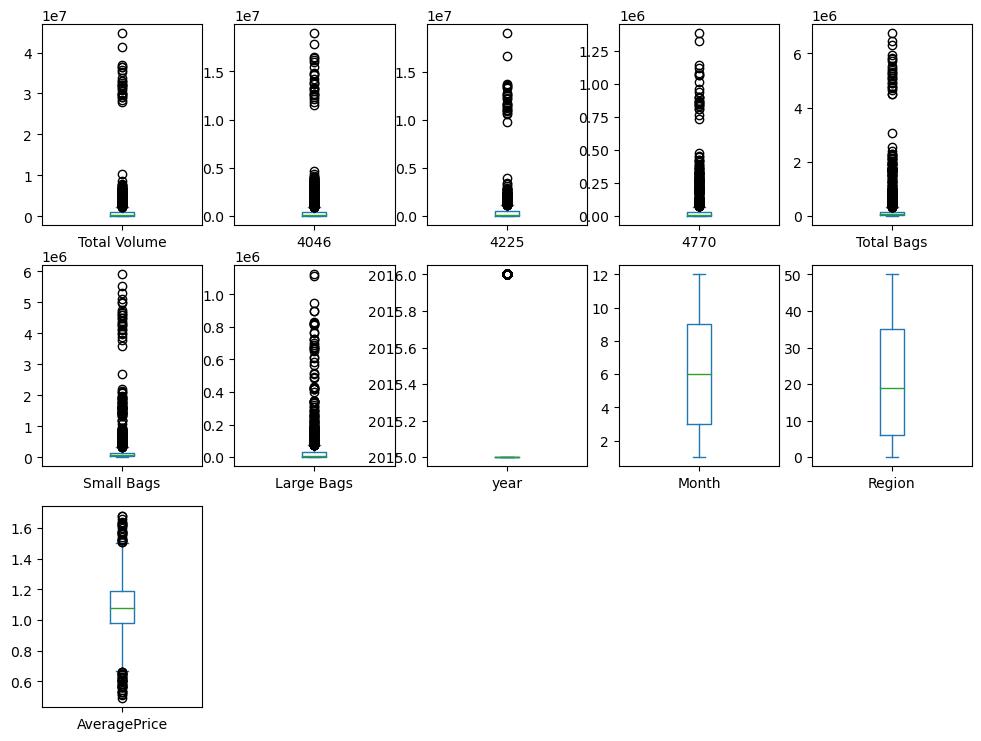

In [42]:
df.plot(kind='box',figsize=(12,12),layout=(4,5),subplots=True)

 By using above box plots also, it has been found that in may columns the huge outliers are present.

In [43]:
df.skew()

Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
year            1.828332
Month           0.101439
Region          0.288146
AveragePrice   -0.109444
dtype: float64

As the skewness are ok except the feature "Year", but that is not considerable for Year type of features. We are trying to reduce the Outliers present in other featurs by using boxcox method.

In [44]:
df['Total Volume']=boxcox(df['Total Volume'],0)

<AxesSubplot:>

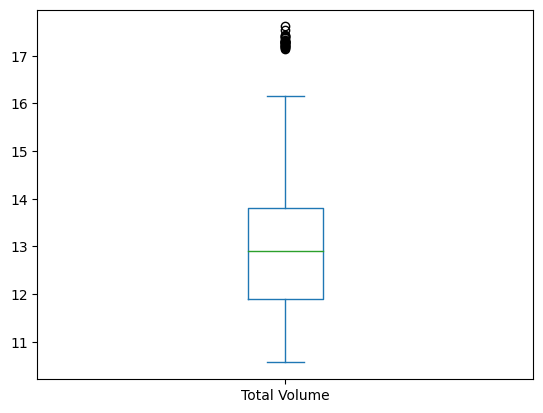

In [45]:
df['Total Volume'].plot.box()

In [46]:
df['4046']=boxcox(df['4046'],0)

<AxesSubplot:>

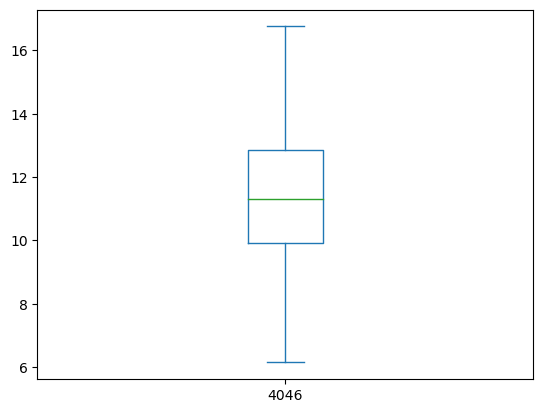

In [47]:
df['4046'].plot.box()

In [48]:
df['4225']=boxcox(df['4225'],0)

<AxesSubplot:>

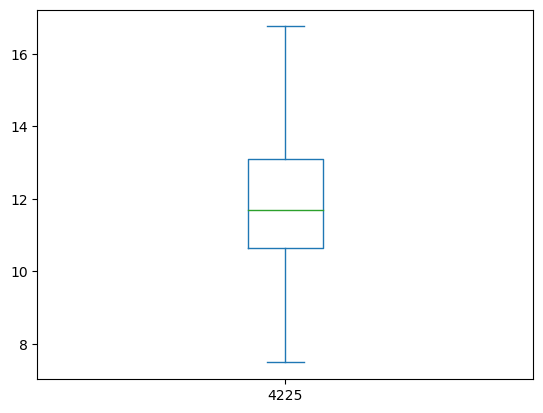

In [49]:
df['4225'].plot.box()

In [50]:
df['4770']=boxcox(df['4770'],0)

<AxesSubplot:>

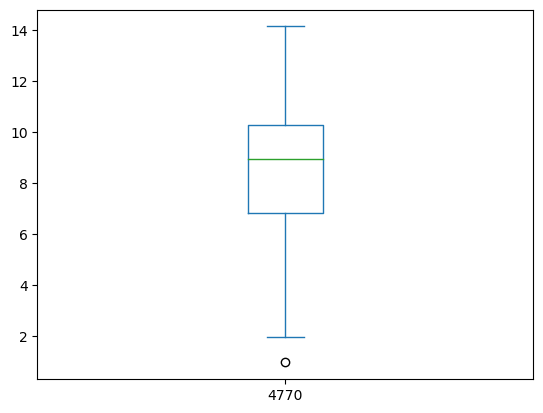

In [51]:
df['4770'].plot.box()

In [52]:
df['Total Bags']=boxcox(df['Total Bags'],0)

<AxesSubplot:>

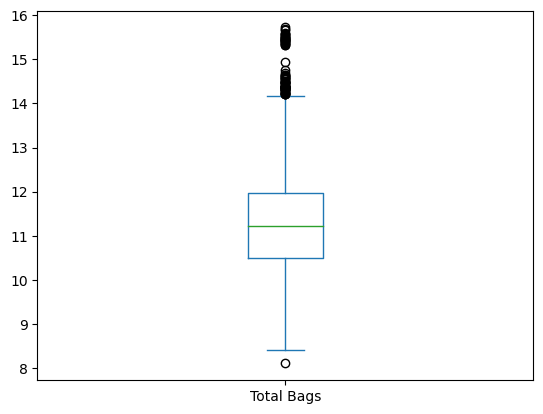

In [53]:
df['Total Bags'].plot.box()

In [54]:
df['Small Bags']=boxcox(df['Small Bags'],0)

<AxesSubplot:>

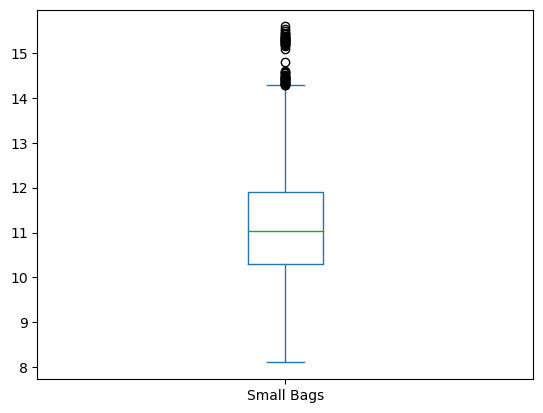

In [55]:
df['Small Bags'].plot.box()

In [56]:
df['Large Bags']=boxcox(df['Large Bags'],0)

<AxesSubplot:>

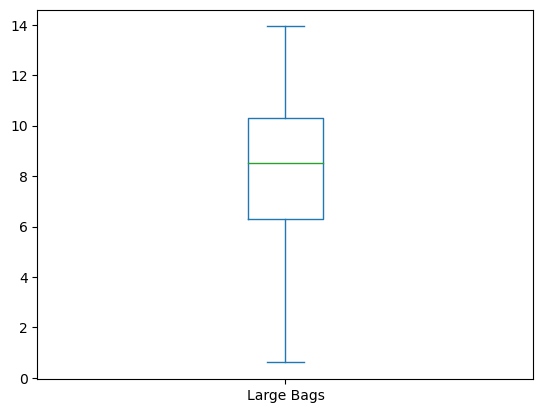

In [57]:
df['Large Bags'].plot.box()

Total Volume       AxesSubplot(0.125,0.712609;0.133621x0.167391)
4046            AxesSubplot(0.285345,0.712609;0.133621x0.167391)
4225             AxesSubplot(0.44569,0.712609;0.133621x0.167391)
4770            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Total Bags      AxesSubplot(0.766379,0.712609;0.133621x0.167391)
Small Bags         AxesSubplot(0.125,0.511739;0.133621x0.167391)
Large Bags      AxesSubplot(0.285345,0.511739;0.133621x0.167391)
year             AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Month           AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Region          AxesSubplot(0.766379,0.511739;0.133621x0.167391)
AveragePrice        AxesSubplot(0.125,0.31087;0.133621x0.167391)
dtype: object

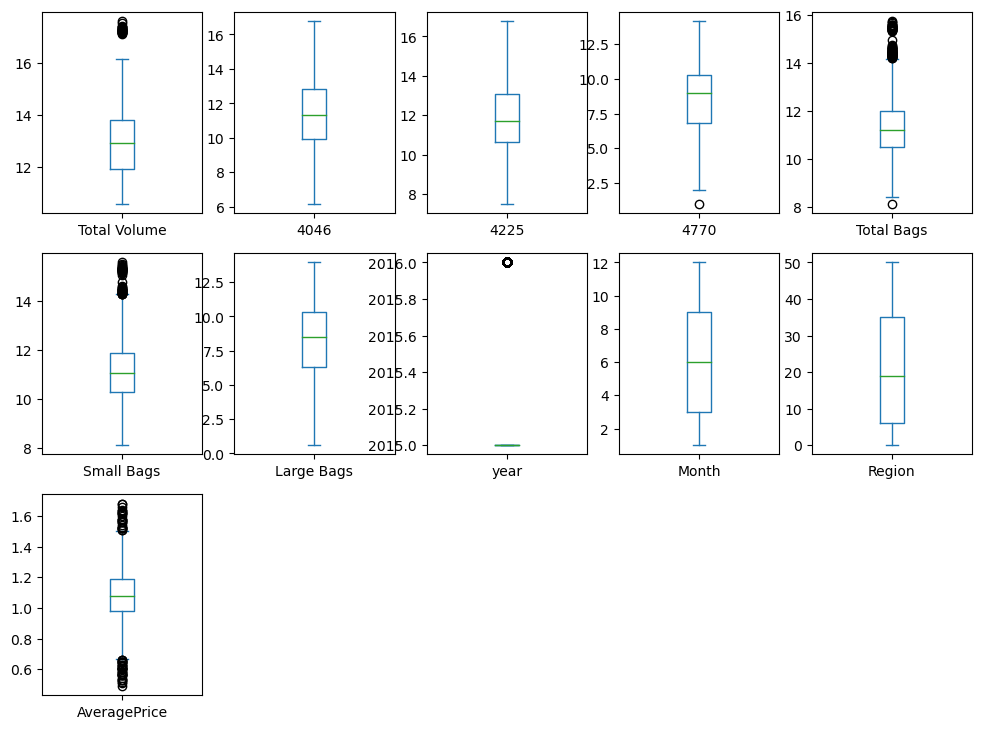

In [58]:
df.plot(kind='box',figsize=(12,12),layout=(4,5),subplots=True)

Again we are checking for the missing values in our processed dataset and also converting all the float data types to integer data type, due to some float value is in very big size to large values after decimals

In [59]:
df.isnull().sum()

Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
year            0
Month           0
Region          0
AveragePrice    0
dtype: int64

In [60]:
df.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
year              int32
Month             int32
Region            int32
AveragePrice    float64
dtype: object

In [61]:
for c in df.select_dtypes(include="float").columns:
    df[c]=le.fit_transform(df[c].astype(str))

In [62]:
df.dtypes

Total Volume    int32
4046            int32
4225            int32
4770            int32
Total Bags      int32
Small Bags      int32
Large Bags      int32
year            int32
Month           int32
Region          int32
AveragePrice    int32
dtype: object

Now we are saving our above cleaned data in another variable for making the Classification & Linear Regression models separately

In [63]:
cdf=df

In [64]:
ldf=df

In [65]:
ldf

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month,Region,AveragePrice
0,71,1181,344,497,1378,1287,511,2015,12,0,81
1,35,1138,251,521,1395,1309,515,2015,12,0,83
2,294,1149,580,623,1371,1280,519,2015,12,0,41
3,152,1188,463,541,1345,1248,540,2015,6,0,56
4,27,1168,244,544,1349,1251,576,2015,11,0,76
...,...,...,...,...,...,...,...,...,...,...,...
1512,501,236,359,1450,422,355,1202,2016,10,7,87
1513,468,137,323,1485,464,417,1159,2016,9,7,99
1514,469,170,331,1436,457,406,1149,2016,2,7,96
1515,495,214,333,1448,475,425,1150,2016,9,7,95


We are separating the independent varialbes and target variable for making our linear regression ML model

In [66]:
lx=ldf.iloc[:,0:-1]

In [67]:
ly=ldf.iloc[:,-1]

In [68]:
lx.shape

(1517, 10)

In [69]:
ly.shape

(1517,)

We are going to try various linear regression algorithms with different random states from 0 to 50 for getting best r2 score.

In [70]:
lr=LinearRegression()

In [71]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    lr.fit(lxtrain,lytrain)
    lpred=lr.predict(lxtest)
    rscore=r2_score(lytest,lpred)
    print(rscore)

0.1353207200239781
0.20297726080853784
0.2546908835905858
0.16224098339009563
0.15661631045586288
0.2159795841947254
0.2603944298052626
0.18252503130488462
0.211798300626877
0.20594599196045815
0.19885315318371932
0.1982274295669355
0.17700428741090035
0.18913459456546722
0.2025857842775276
0.2528852791650875
0.23756397992424882
0.19884285250244915
0.22770798703065476
0.258201345677873
0.17634713148038794
0.20198304940902867
0.24005963104968853
0.23947392363258435
0.2141447810354169
0.16886855566858672
0.23020691346183275
0.24453069026574026
0.16933283573263713
0.22286233994472016
0.24575752668582818
0.2406563874901526
0.2015810965176147
0.19896313857919534
0.22172119282001956
0.17300813353713307
0.26095915655218094
0.19823925487895155
0.23415816565790037
0.22733257001412177
0.1772130334583708
0.23363827676403703
0.21616098463065103
0.2405253666218623
0.141619127436033
0.16918145625989067
0.19930559178616192
0.1822866035701317
0.19596717671367736
0.20690618198932742


In [72]:
sv=SVR()

In [73]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    sv.fit(lxtrain,lytrain)
    lpred=sv.predict(lxtest)
    rscore=r2_score(lytest,lpred)
    print(rscore)

0.17574122554687233
0.21260527033410903
0.22656571695141503
0.22036948791923128
0.19211670669223158
0.21649447554572443
0.21824843173115693
0.21462992932652492
0.21383724844985008
0.21972995860305466
0.2076071624924054
0.21751991703667206
0.2083965023280232
0.2467533623567102
0.19983394265604204
0.22386535329858448
0.20314089057176743
0.2314372832827465
0.22226911304797414
0.20010466079921185
0.20500222239656052
0.2110748713938143
0.24344466146683807
0.23272680428162218
0.22869779879130903
0.20701135506922907
0.2346269807895186
0.21150942387357685
0.20328077451736426
0.23499608504528002
0.22773405484292109
0.22894565687494772
0.20359683620050528
0.21471267448573905
0.21519546602362238
0.2189214502228688
0.2284812553668324
0.21382158374553217
0.23413959442626964
0.23712308626548084
0.21906408204603756
0.22715978072282683
0.2137517880622799
0.21677378147880677
0.2202381037604494
0.22813956880994757
0.19935627170604775
0.21376324423387372
0.1861765739253156
0.23090142606098962


In [74]:
dt=DecisionTreeRegressor()

In [75]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    dt.fit(lxtrain,lytrain)
    lpred=dt.predict(lxtest)
    rscore=r2_score(lytest,lpred)
    print(rscore)

0.6502021676196856
0.596124228913669
0.6810098857430054
0.5566333667253864
0.5466463717172667
0.590783507632701
0.6400233725439237
0.5247653153085434
0.5686178010166529
0.5990633917278592
0.6047541472667075
0.6969582461982246
0.6195629525765569
0.5764760235276647
0.53901577393288
0.6066371562606845
0.6688584031573837
0.609695672403078
0.6165630812492038
0.6567704699388192
0.5907425217504199
0.6625070702823175
0.6711160336984765
0.6929412977702443
0.5811638830772046
0.5351428631701857
0.6329591407688773
0.6604817708333333
0.6064394873017824
0.6029551967980733
0.6209179814273817
0.6222414976650663
0.4773379932085744
0.6035142018661135
0.5572547876497477
0.6417742992172835
0.6740519235816897
0.6462120856185825
0.5838857014449172
0.6025608219547629
0.5358325989013831
0.6708299780314761
0.558221107263837
0.6195906276795778
0.5239717502272568
0.5641271599098335
0.48403545221072886
0.5807504896292974
0.6163440866206396
0.6359417581676687


In [76]:
br=BayesianRidge()

In [77]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    br.fit(lxtrain,lytrain)
    lpred=br.predict(lxtest)
    rscore=r2_score(lytest,lpred)
    print(rscore)

0.12503700701148168
0.20795597594835136
0.21684841944494881
0.17359881360677432
0.15893950055631656
0.19684672278745896
0.2371944160122601
0.17692891967225233
0.1865869736468323
0.1851059529356317
0.18439861569681137
0.18206675820894602
0.16989814224313482
0.19696816411726914
0.17381986421894036
0.22124940033728857
0.20030524740230515
0.19962104267327807
0.2209290032812361
0.22693029336222703
0.16530850347550363
0.17675966961890832
0.2249421455058639
0.2219558101191873
0.19105297446969782
0.1588371743072654
0.20733673682936826
0.20731017413888408
0.15226912247592095
0.2296508741869311
0.228325577904811
0.21347150394304593
0.1699954160689684
0.1949993416644421
0.19559688504055683
0.17901223387716347
0.23089394807808494
0.1846593635028183
0.21724372416977644
0.23347591977351412
0.1695490469269153
0.21668819891112767
0.19787593241164703
0.20883177714142642
0.1407731942494841
0.17177252843355273
0.1638998214325783
0.17419312779125107
0.16787042663844653
0.19204169410962257


In [78]:
gb=GradientBoostingRegressor()

In [79]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    gb.fit(lxtrain,lytrain)
    lpred=gb.predict(lxtest)
    rscore=r2_score(lytest,lpred)
    print(rscore)

0.6819782904119023
0.7060635013440959
0.7317215786408972
0.6776936606048884
0.6691661577980608
0.6919917235314819
0.7183121227413155
0.670703585155205
0.6837220110928159
0.7181811046692265
0.7311180587447923
0.7323048396359679
0.7134370930216616
0.7114193622356568
0.6575567513605232
0.7064674644539157
0.684771833469792
0.726522623598505
0.704557398086215
0.717400577864004
0.7168466063785166
0.6986862809320264
0.72454494897245
0.704418746769703
0.6912758991334589
0.6794659694245897
0.7176358817103006
0.7249943579369422
0.7434937552694545
0.723265494164941
0.7284547326160777
0.7174346986149659
0.69741333656533
0.7068806627468119
0.6733472276644418
0.7221837274710661
0.7047089229837888
0.6568920529580293
0.7455950988645472
0.7028569204561939
0.7182446439298708
0.7140130848030746
0.693250608384036
0.7212893075421904
0.6763464808273586
0.6615525334342172
0.6864045536480913
0.7346858843705533
0.6861438949026761
0.7124354128302366


In [80]:
kn=KNeighborsRegressor()

In [81]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    kn.fit(lxtrain,lytrain)
    lpred=kn.predict(lxtest)
    rscore=r2_score(lytest,lpred)
    print(rscore)

0.7073311110432773
0.7421130512514125
0.7227405633390254
0.6484694853720063
0.6813405868638498
0.7403286355863028
0.7158338406362468
0.689706412578758
0.7424372194414707
0.7462535683823028
0.730516705576244
0.7552853331637015
0.7198893233374541
0.7095849904747051
0.7130790864978876
0.7168814974853497
0.7425745214326418
0.7278125130070776
0.722680576345118
0.7420279727747796
0.7105592049502052
0.7444267304248251
0.7418140394215714
0.6896647897828705
0.7279299065950157
0.7214095228390336
0.6907193848081861
0.735038115530303
0.7401480816044589
0.7240931313580365
0.7399173608266146
0.7013164304611348
0.72126211269412
0.7263667902529233
0.6716719192809558
0.7337519964080964
0.6870254242755848
0.7259771735433154
0.7236107570020325
0.7093418348236327
0.7227956938986564
0.7045123941369251
0.6915199903859877
0.7645291869623313
0.6734190522807264
0.691929383172107
0.7387270951876777
0.7513978490394876
0.6925829877297143
0.7277499679574051


In [82]:
ar=AdaBoostRegressor()

In [83]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    ar.fit(lxtrain,lytrain)
    lpred=ar.predict(lxtest)
    rscore=r2_score(lytest,lpred)
    print(rscore)

0.5303058490027366
0.5903582496622573
0.5787375552364618
0.5089912239160683
0.5118002340484079
0.547250999337149
0.616088757565789
0.5404856561616966
0.5697205255535276
0.5826457039113427
0.5601972996046674
0.5674707127782297
0.5420740266984353
0.5631879502389698
0.5445531643356243
0.5896548722267423
0.5442644135420285
0.5761277086999794
0.5855651356093265
0.6297262728225073
0.5829518429264215
0.5793780497544707
0.5613319590567889
0.5610215129713993
0.5532663782083662
0.5179226242164572
0.5654132784209757
0.5925206695264176
0.5798926589644644
0.5734098261982108
0.5756214192643347
0.5295578512126373
0.5360917418233988
0.5934936707024349
0.5286143437869397
0.5028614146535664
0.5801202897172968
0.4834659402241398
0.5854256475255656
0.5501804086469781
0.5636281944898491
0.5374505984898135
0.5534686650379459
0.5772725561268426
0.4714714839683962
0.5175961918445072
0.5745708327922888
0.5602793820645335
0.5789734887737856
0.6101937688042328


By the above outputs we got that (1) Gradient Boosting Regressor Algo with Random State 38 and K Neighbors Regressor with Random State 22 is giving the best r2 scores above 74%. So we are going to use these 2 Alogs for our further process.

We are trying to select best feature to make model

In [84]:
kb=SelectKBest(score_func=f_regression, k=10)

In [85]:
lx_train=kb.fit_transform(lxtrain,lytrain)

In [86]:
lx_test=kb.transform(lxtest)

In [87]:
lx_train.shape

(1061, 10)

In [88]:
lx_test.shape

(456, 10)

In [89]:
kn.fit(lx_train,lytrain)

KNeighborsRegressor()

In [90]:
skn_pred=kn.predict(lx_test)

In [91]:
r2_score(skn_pred, lytest)

0.632051109504286

By using the best 10 Features out of 11 Features, we got only 63% approximate accurate prediction. So we will try something more further.

In [92]:
lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=38)

In [93]:
gb.fit(lxtrain,lytrain)

GradientBoostingRegressor()

In [94]:
lpred=gb.predict(lxtest)

In [95]:
r2_score(lytest,lpred)

0.7453699923585888

In [96]:
mean_absolute_error(lytest,lpred)

7.422949287907117

By using Gradient Boosting Regressor with random state 38, we are getting above 74% accurate prediction with 7.41 MAE error. So we may try for the K Neighbors Regressor also with random state 22.

In [97]:
lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=22)

In [98]:
kn.fit(lxtrain,lytrain)

KNeighborsRegressor()

In [99]:
kpred=kn.predict(lxtest)

In [100]:
r2_score(lytest,kpred)

0.7418140394215714

In [101]:
mean_absolute_error(lytest,kpred)

6.386403508771929

By KNN Regressor also the prediction accuracy is approximately above 74% and the MAE error reduced a little

In [102]:
scl=StandardScaler()

In [103]:
lxtrain=scl.fit_transform(lxtrain)

In [104]:
lxtest=scl.transform(lxtest)

In [105]:
ls=Lasso(alpha=0.5)

In [106]:
ls.fit(lxtrain,lytrain)

Lasso(alpha=0.5)

In [107]:
lspred=ls.predict(lxtest)

In [108]:
r2_score(lytest,lspred)

0.2346003284122723

By using the L1 Regularization (Lasso), the result is not satisfactory

As of now, we observed that the Gredient Boosting & KNN Algos are giving better results for our Linear Model than others

So we are going to test the Hyperparameter Tuning with these 2 Algos one by one to get the best one to save for our further ML Model.

In [109]:
gs1=GridSearchCV(estimator=gb,param_grid={"n_estimators":[100,200,300],"learning_rate":[0.001,0.01,0.1],"max_depth":[2,3,4]},cv=3,n_jobs=-1)

In [110]:
gs1.fit(lxtrain,lytrain)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]})

In [111]:
gs1.score(lxtest,lytest)

0.7903707670309408

In [112]:
gs2=GridSearchCV(estimator=kn,param_grid={"n_neighbors":[2,4,6,8],'p':[2,3], 'weights':['distance','uniform']},cv=2,n_jobs=-1)

In [113]:
gs2.fit(lxtrain,lytrain)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8], 'p': [2, 3],
                         'weights': ['distance', 'uniform']})

In [114]:
gs2.score(lxtest,lytest)

0.6751194139561636

As above, it is showing that the Gradient Boosting Regressor is giving better result of above 79% accurate prediction than KNN Regressor of approximately 67% only. So before saving this model, we are going to check that whether this gb model is giving higher accuracy for the unseen data also, if we are not mentioning any random state.

In [115]:
gbpred=gb.predict(lxtest)

In [116]:
r2_score(lytest,gbpred)

-0.602042014016035

In [117]:
mean_absolute_error(lytest,gbpred)

18.090123738841566

The prediction accuracy of gb model is good of 80% and the MAE error is 6.46, so we want to try another Algo the Random Forest Regressor to check, whether we may improve some accuracy and reduce some error.

In [118]:
rf=RandomForestRegressor(n_estimators=100)

In [119]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    rf.fit(lxtrain,lytrain)
    rfpred=rf.predict(lxtest)
    rscore=r2_score(lytest,rfpred)
    print(rscore)

0.7804496744218566
0.8116093566073337
0.8297245131698775
0.7765310331227986
0.7677669496246039
0.7883338195796181
0.8080442965231027
0.7575964784492171
0.7942785136444815
0.7885654952673169
0.7848941823002191
0.8200138669315112
0.8016975418580908
0.80408096219858
0.7642406983241063
0.8062732948698474
0.7933368385956395
0.7905966331762372
0.8000322468100325
0.7992886318626683
0.782983127613304
0.7983947318112512
0.8260275533958011
0.8034012106396766
0.7960063197797267
0.7943201246117835
0.7999029349147344
0.8099145010653409
0.8213043207877653
0.7905684572382704
0.8174126141491609
0.7854145883908228
0.7910939572913973
0.7995373095195125
0.7682795857499096
0.8009273914547232
0.8135771259798539
0.7913696421618258
0.8189095357788789
0.789312564708105
0.7871288936453817
0.7987591835833904
0.7760879210020033
0.8341985683509526
0.7890715386802788
0.7513714033618311
0.7806630350685876
0.8272295819666973
0.7827116578322724
0.8126308797117914


In [120]:
mean_absolute_error(lytest,rfpred)

5.883618421052631

The accuracies are above 75% for all the random states and the error reduced to 5.85

In [121]:
cv=cross_val_score(rf,lx,ly,cv=KFold(n_splits=3))

In [122]:
cv.mean()

0.14029040942799983

The cross validation is not coming very good

In [123]:
test=rf.predict(lxtest)

In [124]:
r2_score(lytest,test)

0.8126308797117914

We are getting above 81% prediction accuracy and 5.85 error with Random Forest Algo with the unseen test data

So now we will do some Hyperparameter Tuning on this rf model (i.e. Random Forest Algo)

In [125]:
gs3=GridSearchCV(estimator=rf,param_grid={"n_estimators":[100,200],"max_depth":[30,40]},cv=3,n_jobs=-1)

In [126]:
gs3.fit(lxtrain,lytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [30, 40], 'n_estimators': [100, 200]})

In [127]:
gs3.score(lxtest,lytest)

0.8193866231796152

By using Hyperparameter Tuning also, we are getting a very good prediction accuracy of above 80%. So now we are going to save this rf ML Model

In [128]:
pickle.dump(rf, open('linear_avocado', 'wb'))

In [129]:
lrf_model=pickle.load(open('linear_avocado', 'rb'))

In [130]:
model_lpred=lrf_model.predict(lxtest)

In [131]:
r2_score(lytest, model_lpred)

0.8126308797117914

Our above saved rf Machine Learning Model is working very good with above 81% prediction accuracy. So our Linear ML Model making work has been done for the Avocado Dataset.

Now we will make the Classification ML Model of the same Avocado Dataset.

In [132]:
cdf

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month,Region,AveragePrice
0,71,1181,344,497,1378,1287,511,2015,12,0,81
1,35,1138,251,521,1395,1309,515,2015,12,0,83
2,294,1149,580,623,1371,1280,519,2015,12,0,41
3,152,1188,463,541,1345,1248,540,2015,6,0,56
4,27,1168,244,544,1349,1251,576,2015,11,0,76
...,...,...,...,...,...,...,...,...,...,...,...
1512,501,236,359,1450,422,355,1202,2016,10,7,87
1513,468,137,323,1485,464,417,1159,2016,9,7,99
1514,469,170,331,1436,457,406,1149,2016,2,7,96
1515,495,214,333,1448,475,425,1150,2016,9,7,95


As we have to predict the "Rigion", we are shifting this feature to the last column

In [133]:
target2=cdf.pop('Region')

In [134]:
cdf.insert(10, 'Region', target2)

In [135]:
cdf

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month,AveragePrice,Region
0,71,1181,344,497,1378,1287,511,2015,12,81,0
1,35,1138,251,521,1395,1309,515,2015,12,83,0
2,294,1149,580,623,1371,1280,519,2015,12,41,0
3,152,1188,463,541,1345,1248,540,2015,6,56,0
4,27,1168,244,544,1349,1251,576,2015,11,76,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,501,236,359,1450,422,355,1202,2016,10,87,7
1513,468,137,323,1485,464,417,1159,2016,9,99,7
1514,469,170,331,1436,457,406,1149,2016,2,96,7
1515,495,214,333,1448,475,425,1150,2016,9,95,7


As the Data Preprocessing and Feature Engineering works have already been done of this dataset earlier. We are moving towards Training & Testing of our Classificaton Model with various classification algorithms.

In [136]:
cx=cdf.iloc[:,0:-1]

In [137]:
cy=cdf.iloc[:,-1]

In [138]:
cx.shape

(1517, 10)

In [139]:
cy.shape

(1517,)

In [140]:
lg=LogisticRegression()

In [141]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    lg.fit(cxtrain,cytrain)
    pred=lg.predict(cxtest)
    ascore=accuracy_score(cytest,pred)
    print(ascore)

0.7631578947368421
0.7894736842105263
0.7587719298245614
0.7741228070175439
0.7828947368421053
0.7872807017543859
0.7631578947368421
0.7697368421052632
0.7697368421052632
0.7850877192982456
0.7960526315789473
0.7807017543859649
0.7697368421052632
0.7982456140350878
0.7521929824561403
0.8157894736842105
0.8026315789473685
0.8223684210526315
0.7741228070175439
0.7763157894736842
0.7982456140350878
0.8179824561403509
0.8070175438596491
0.8135964912280702
0.7982456140350878
0.7675438596491229
0.7916666666666666
0.7631578947368421
0.8092105263157895
0.7960526315789473
0.7653508771929824
0.8004385964912281
0.7741228070175439
0.7631578947368421
0.793859649122807
0.7697368421052632
0.75
0.7741228070175439
0.7741228070175439
0.793859649122807
0.7719298245614035
0.7828947368421053
0.756578947368421
0.8114035087719298
0.7609649122807017
0.8179824561403509
0.7324561403508771
0.8421052631578947
0.7587719298245614
0.7872807017543859


In [142]:
balanced_accuracy_score(cytest,pred)

0.7649976714107147

We are getting the very good prediction accuracies above 75% with Logistic Regression by using all the random states from 0 to 50 as above. But via Random State 47, we found above 84% accurate prediction, so we are using that random state separately also as following

In [143]:
cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=47)

In [144]:
lg.fit(cxtrain,cytrain)

LogisticRegression()

In [145]:
lgpred=lg.predict(cxtest)

In [146]:
accuracy_score(cytest,lgpred)

0.8421052631578947

In [147]:
confusion_matrix(cytest,lgpred)

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0, 25, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  6]], dtype=int64)

We are getting very good accuracy with lower confusions by using matrix. Now going to check different cross validations also for our classification model

In [148]:
cv1=cross_val_score(lg,cx,cy,cv=KFold(n_splits=10))

In [149]:
cv1.mean()

0.11469153014987801

In [150]:
cv2=cross_val_score(lg,cx,cy,cv=StratifiedKFold(n_splits=10))

In [151]:
cv2.mean()

0.756700941094458

In [152]:
cv3=cross_val_score(lg,cx,cy,cv=ShuffleSplit(train_size=0.5,test_size=0.5,n_splits=5))

In [153]:
cv3.mean()

0.7725955204216074

We are getting a good cv result via Startified KFold because of the classification type Target and it ensures for each Fold have same proportion of each class. Also the Shuffle Split cross validation is also giving good results via its manual training, testing sizes along with number of iterations.

In [154]:
gs4=GridSearchCV(estimator=lg,param_grid={'penalty':['l1','l2'],'C':[0.001,0.01,0.1]},scoring='accuracy',cv=10,refit=True,return_train_score=True)

In [155]:
gs4.fit(cxtrain,cytrain)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [156]:
gs4pred=gs4.predict(cxtest)

In [157]:
accuracy_score(cytest,gs4pred)

0.8377192982456141

By using the Hyperparameter Tuning with both L1 & L2 Regularization Penalties, also we are getting a very good prediction accuracy of above 83% with lower confusions matrix.

In [158]:
confusion_matrix(cytest,gs4pred)

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0, 25, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  6]], dtype=int64)

So we are going to save our Classification Model also

In [159]:
pickle.dump(lg, open('classification_avocado', 'wb'))

In [160]:
lg_model=pickle.load(open('classification_avocado', 'rb'))

In [161]:
model_cpred=lg_model.predict(cxtest)

In [162]:
accuracy_score(cytest,model_cpred)

0.8421052631578947

Our saved Classification ML model is giving very good result above 84% accuracy to predict the target variable "Region" of the unseen testing data of our Avocado dataset.